# Use this:<br> conda install pillow
<br> This should fix PIL, I think

In [1]:
import PIL.Image
from numpy import asarray
from PIL import Image
from numpy import fliplr
from numpy import flipud

import plaidml.keras
plaidml.keras.install_backend()

#from tensorflow.keras import backend
# "Sequential" model lets us to define a stack of neural network layers
from keras.models import Sequential

# import the "core" layers:
from keras.layers import Dense, Dropout, Activation, Flatten
import matplotlib.image as mpimg

# CNN
from keras.layers import Convolution2D, MaxPooling2D

# import some utilities to transform our data
from keras.utils import np_utils

from sklearn.model_selection import train_test_split

import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
'''
import os
counter = 0
d = "C:/Users/Alan/Desktop/Data_Science_2/final_project/train"
for path in os.listdir(d):
    full_path = os.path.join(d, path)
    if os.path.isfile(full_path):
        img = Image.open(full_path)
        maxsize = (64, 64)
        img = img.resize(maxsize, PIL.Image.ANTIALIAS)
        img.save('resized_photos/'+ str(counter) + '.jpg')
        counter += 1
'''

'\nimport os\ncounter = 0\nd = "C:/Users/Alan/Desktop/Data_Science_2/final_project/train"\nfor path in os.listdir(d):\n    full_path = os.path.join(d, path)\n    if os.path.isfile(full_path):\n        img = Image.open(full_path)\n        maxsize = (64, 64)\n        img = img.resize(maxsize, PIL.Image.ANTIALIAS)\n        img.save(\'resized_photos/\'+ str(counter) + \'.jpg\')\n        counter += 1\n'

In [3]:
listForX = []
listForFlipX = []
for x in range(0, 10222):
    test = mpimg.imread("/Users/Alan/Desktop/Data_Science_2/final_project/resized_photos/"+str(x)+".jpg")
    testing = (test.reshape(1, 12288))
    listForX.append(testing[0])
    testFlip = fliplr(test)
    testingFlip = (testFlip.reshape(1, 12288))
    listForFlipX.append(testingFlip[0])

In [4]:
#listForFlipX[0]

In [5]:
#listForX[0]

In [6]:
#listForFlipVX[0]

In [7]:
X = np.concatenate((listForX, listForFlipX), axis=0)

In [8]:
#hello.shape

In [9]:
X.shape

(20444, 12288)

In [50]:
y = pd.read_csv("/Users/Alan/Desktop/Data_Science_2/final_project/labels.csv")

In [51]:
y = y.drop(['id'], axis=1)

In [52]:
y['breed'] = pd.factorize(y['breed'])[0]

In [53]:
y2 = y.breed.tolist()

In [54]:
y = y.breed.tolist() + y.breed.tolist()

In [55]:
X2 = np.asarray(listForX)

In [56]:
len(y)

20444

In [57]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=2)

In [58]:
#y = yTest

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=2)

In [60]:
X_train = X_train.reshape(X_train.shape[0], 64, 64, 3)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 3)

X_train2 = X_train2.reshape(X_train2.shape[0], 64, 64, 3)
X_test2 = X_test2.reshape(X_test2.shape[0], 64, 64, 3)

In [61]:
y_train = np_utils.to_categorical(y_train, 120)
y_test = np_utils.to_categorical(y_test, 120)

y_train2 = np_utils.to_categorical(y_train2, 120)
y_test2 = np_utils.to_categorical(y_test2, 120)

In [62]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

X_train2 = X_train2.astype('float32')
X_test2 = X_test2.astype('float32')
X_train2 /= 255
X_test2 /= 255

In [22]:
X_train.shape

(18399, 64, 64, 3)

In [23]:
model = Sequential()

In [24]:
model.add(Convolution2D(16, (3, 3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.35)) 
print(model.output_shape) # -> (None, 26, 26, 32)

INFO:plaidml:Opening device "opencl_amd_gfx900.0"


(None, 31, 31, 16)


In [25]:
# more hidden layers:
model.add(Convolution2D(32, (3, 3), activation='relu'))
# Pooling Layer:
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(0.35)) 

model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

print(model.output_shape)

# Dropout layer to avoid overfitting
model.add(Dropout(0.35)) 

(None, 6, 6, 64)


In [26]:
# output Fully connected Dense layers:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(120, activation='softmax'))

In [27]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],
              optimizer='adam')

In [28]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
__________

In [29]:
X_train.shape

(18399, 64, 64, 3)

In [30]:
y_train.shape

(18399, 120)

In [31]:
from keras.callbacks import EarlyStopping

fitted_model = model.fit(X_train, y_train, validation_split=0.1, batch_size=64, epochs=60, shuffle=True, verbose=1)

Train on 16559 samples, validate on 1840 samples
Epoch 1/60


INFO:plaidml:Analyzing Ops: 108 of 298 operations complete


16512/16559 [============================>.] - ETA: 0s - loss: 4.7873 - acc: 0.0102

INFO:plaidml:Analyzing Ops: 106 of 298 operations complete


16559/16559 [==============================] - 24s 1ms/step - loss: 4.7872 - acc: 0.0103 - val_loss: 4.7823 - val_acc: 0.0109
Epoch 2/60
16559/16559 [==============================] - 7s 415us/step - loss: 4.7470 - acc: 0.0153 - val_loss: 4.6714 - val_acc: 0.0304
Epoch 3/60
16559/16559 [==============================] - 7s 419us/step - loss: 4.6234 - acc: 0.0252 - val_loss: 4.5547 - val_acc: 0.0353
Epoch 4/60
16559/16559 [==============================] - 7s 403us/step - loss: 4.5121 - acc: 0.0348 - val_loss: 4.4234 - val_acc: 0.0446
Epoch 5/60
16559/16559 [==============================] - 7s 406us/step - loss: 4.4373 - acc: 0.0361 - val_loss: 4.3594 - val_acc: 0.0549
Epoch 6/60
16559/16559 [==============================] - 7s 400us/step - loss: 4.3849 - acc: 0.0396 - val_loss: 4.3475 - val_acc: 0.0533
Epoch 7/60
16559/16559 [==============================] - 7s 426us/step - loss: 4.3443 - acc: 0.0461 - val_loss: 4.3124 - val_acc: 0.0592
Epoch 8/60
16559/16559 [======================

16559/16559 [==============================] - 6s 385us/step - loss: 3.6043 - acc: 0.1370 - val_loss: 3.8845 - val_acc: 0.1082


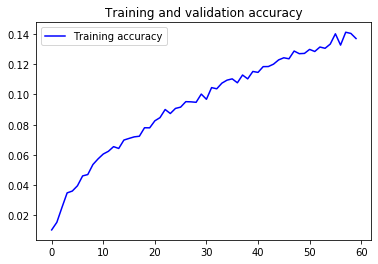

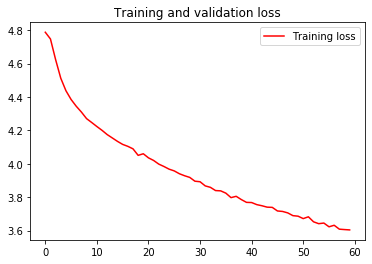

In [32]:
import matplotlib.pyplot as plt

%matplotlib inline

accuracy = fitted_model.history['acc']
#val_accuracy = history.history['val_acc']
loss = fitted_model.history['loss']
#val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b-', label='Training accuracy')
#plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r-', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
# plt.show()

In [33]:
y_pridict = model.predict(X_test, verbose=1)
print (y_pridict.shape)

2045/2045 [==============================] - 4s 2ms/step
(2045, 120)


In [34]:
#y_pridict

In [35]:
score = model.evaluate(X_test, y_test, verbose=1)
print('The accuracy is: ', score[1])

2045/2045 [==============================] - 4s 2ms/step
The accuracy is:  0.10953545231909508


In [63]:
score = model.evaluate(X_test2, y_test2, verbose=1)
print('The accuracy is: ', score[1])

2045/2045 [==============================] - 0s 179us/step
The accuracy is:  0.21075794619569568
